In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
dataset=pd.read_csv("house_data.csv")
dataset.head()
# this is pandas dataframe object

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#lets slice sqft_living and price column for all rox
x = dataset.loc[:,["sqft_living","price"]]
x.head()



,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


In [11]:
data=(x-x.mean())/x.std()
data.head()

,sqft_living,price
0,-0.979812,-0.866697
1,0.533622,-0.005688
2,-1.426221,-0.980827
3,-0.130547,0.174086
4,-0.435412,-0.081956


In [5]:
type(x)
# still dataframe object

pandas.core.frame.DataFrame

In [15]:
data=data.values
N = len(data)


In [13]:
# lets build a function to scatter the point for reusability
# it takes x axis and yaxis element to populate the graph
def my_scatter_func(x,y):
    plt.figure(figsize=(10,5))
    plt.scatter(x,y,color="g",label="ratings")
    plt.title("ADRvs Rating")
    plt.xlabel("ADR")
    plt.ylabel("Rating")
    plt.legend()

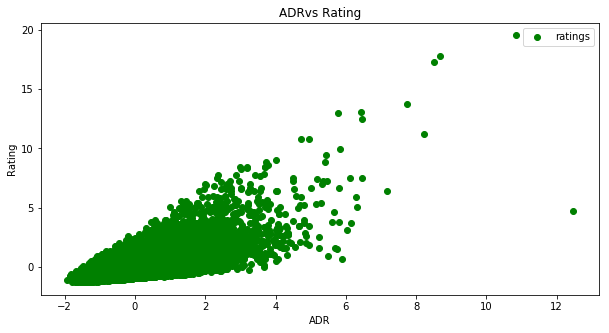

In [17]:
# lets call my_scatter_function to scatter my points
my_scatter_func(data[:,0],data[:,1])
plt.show()

In [18]:
# lets create a error_calculation function to calculate average error 
def error_calculation(m,b,data):
    total_error = 0

    for i in range(N):
        real_output = data[i,1]
        x = data[i,0]
        predicted_output = (m*x+b)
        total_error+=float((predicted_output-real_output)**2)
    return total_error

    

In [19]:
# lets create a my_plot_func to plot the line for reusability
# here we anly supply x axis element for plot function so we calculate y-axis element inside the function
def my_plot_func(b,m,data):
    plt.plot(data[:,0],m*data[:,0]+b,label="fitting line",color="r")
    plt.legend(loc="best")

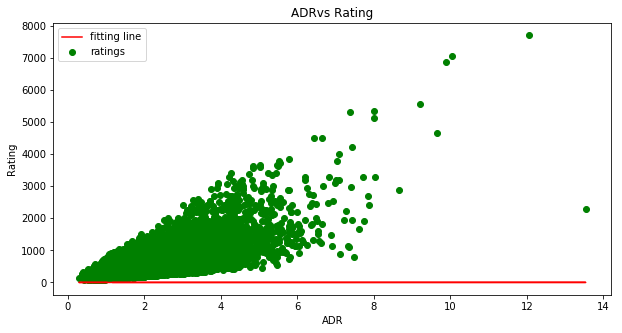

In [125]:
#lets see the linner line fitting with b=2 and m=3
# it seems funny.....HAHAHAHAHAHA
my_scatter_func(data[:,0],data[:,1])
my_plot_func(1,0.1,data)
plt.show()

In [20]:
#lets compute total error by calling ourpreviously defined error_calculation function 
#to see error for above fitting
error=error_calculation(2,3,data)
error

241887.47359891928

In [ ]:
# lets visualize 3D graph of m and b with cost
%matplotlib inline
m=np.arange(-5,5,0.1)
b=np.arange(-5,5,0.1)

fig=plt.figure(figsize=(18,8))
fig1=fig.add_subplot(121,projection="3d")
fig1.view_init(elev=20,azim=220)
x,y=np.meshgrid(m,b)
cost=np.array([error_calculation(m,b,data) for m,b in zip(np.ravel(x),np.ravel(y))])
z=cost.reshape(x.shape)
fig1.plot_surface(x,y,z)
fig1.set_xlabel("M")
fig1.set_ylabel("B")
fig1.set_zlabel("Cost")
plt.show()

In [21]:
def gradient_descent_step(m,b,data):
    
    m_grad = 0
    b_grad = 0
    
    for i in range(N):

        #Get current pair (x,y)
        x = data[i,0]
        y = data[i,1]

        #Update gradient
        m_grad = m_grad + ((2/N)*((m*x+b)-y)*x)
        b_grad = b_grad + ((2/N)*((m*x+b)-y))
    
    #Set the new 'better' updated 'm' and 'b'
    m_updated = m - 0.001*m_grad
    b_updated = b - 0.001*b_grad
   
    return m_updated,b_updated

In [26]:
def gradient_descent_step_by_step(m_starting,b_starting,data,steps): #For doing it many times in an easy way 
    print(f'Starting line: y ={m_starting}X + {b_starting} and Error:{error_calculation(m_starting,b_starting,data)}')
    m = m_starting
    b = b_starting
    for i in range(steps):
        m,b = gradient_descent_step(m,b,data)
        if(i % 500 == 0):
            sse = error_calculation(m,b,data)
            print(f'At step {i} - Line: y = {m}X + {b} - Error: {sse}')
    
    
    print(f'At step {i} - Line: y = {m}X + {b} - Error: {sse}')
    return m,b

In [27]:
M_STARTING = 0
B_STARTING = 0
NUM_STEPS = 10000
m,b = gradient_descent_step_by_step(M_STARTING,B_STARTING,data,NUM_STEPS)

Starting line: y =0X + 0 and Error:21611.999999999873
At step 0 - Line: y = 0.0014040051450765923X + -3.581255300991182e-20 - Error: 21569.4383985727
At step 500 - Line: y = 0.4445333206255264X + -6.811367842093814e-17 - Error: 12393.486229307518
At step 1000 - Line: y = 0.6073958817455589X + -1.3112361815428105e-16 - Error: 11154.025711221064
At step 1500 - Line: y = 0.6672524809096614X + -1.6836069931642386e-16 - Error: 10986.603045152713
At step 2000 - Line: y = 0.6892514746553836X + -1.7911011323508955e-16 - Error: 10963.988085898634
At step 2500 - Line: y = 0.6973367272855492X + -1.879451581540615e-16 - Error: 10960.933323995327
At step 3000 - Line: y = 0.7003082863872612X + -1.942750455332883e-16 - Error: 10960.52069577958
At step 3500 - Line: y = 0.7014004184329583X + -1.9428023276305748e-16 - Error: 10960.464959178886
At step 4000 - Line: y = 0.7018018078599954X + -1.9424528757178584e-16 - Error: 10960.457430443465
At step 4500 - Line: y = 0.7019493298311438X + -1.9432149343198

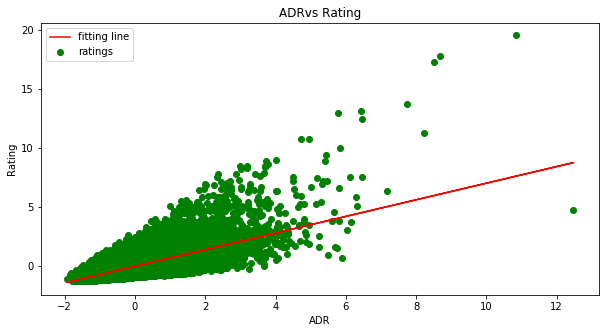

In [28]:
my_scatter_func(data[:,0],data[:,1])
my_plot_func(b,m,data)
plt.show()

In [29]:
f'The obtained line is y={m}X+{b}' 

'The obtained line is y=0.7020350531921733X+-1.943422491273241e-16'

In [30]:
# for testing first do feature scaling for independent frature and computedesired value Y
# since our y is also featured scale apply reverse feature scaling to output as we have to scale back it to orginalfor
#y*std+mean
